In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
num_data = {
    'netifier': 7773,
    'dat': 500,
    'hsd': 13169,
    'casa': 1080,
    'hoasa': 2854,
}

In [8]:
def average_results(results):
    mean_results = pd.concat(results).groupby(level=0).mean()
    std_results = pd.concat(results).groupby(level=0).std()
    return mean_results, std_results

def plot_results(dataset, result, metric='F1 Micro'):
    data_used = [round(x / num_data[dataset] * 100, 0) for x in result['lc']['Data Used']]
    plt.figure(figsize=(15, 10))

    for method in result.keys():
        if method != 'passive':
            plt.plot(data_used, result[method][metric], label=method.upper(), marker='o')
        elif metric != 'Sampling Duration':
            plt.plot(data_used, result[method][metric], label=method.upper(), linestyle='--', color='black')

    plt.title(dataset.upper())
    plt.xlabel("Data Used (%)")
    plt.ylabel(metric)
    plt.legend(fontsize='x-large')
    plt.grid(True, axis='x')

    plt.xticks(data_used)
    plt.tight_layout()
    plt.show()

In [9]:
def load_result(dataset, ignored_method=None):
    methods = ['lc', 'mc', 'kmeans', 'coreset', 'comal', 'besra', 'random']
    result = {}

    if ignored_method is not None:
        for method in ignored_method:
            methods.remove(method)
    
    for method in methods:
        for i in range (1, 6):
            if i == 1:
                result[method] = [pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv")]
            else:
                result[method].append(pd.read_csv(f"../{dataset}/metrics/{dataset}-{method}-{i}-results.csv"))

    for method in methods:
        result[method], std = average_results(result[method])
        print(f"{method.upper()} STD: {std['F1 Micro'].mean()}")
    
    passive_result = pd.read_csv(f"../{dataset}/metrics/{dataset}-passive-results.csv")
    result['passive'] = pd.DataFrame({
        'Accuracy': [np.mean(passive_result['Accuracy']) for i in range(len(result['lc']))],
        'F1 Micro': [np.mean(passive_result['F1 Micro']) for i in range(len(result['lc']))],
        'F1 Macro': [np.mean(passive_result['F1 Macro']) for i in range(len(result['lc']))],
    })

    return result

# NETIFIER

LC STD: 0.004846623580894969
MC STD: 0.0036811149798710325
KMEANS STD: 0.004816160252828078
CORESET STD: 0.004832688921671002
COMAL STD: 0.006163947617329578
BESRA STD: 0.005249545598316776
RANDOM STD: 0.004093986109147583


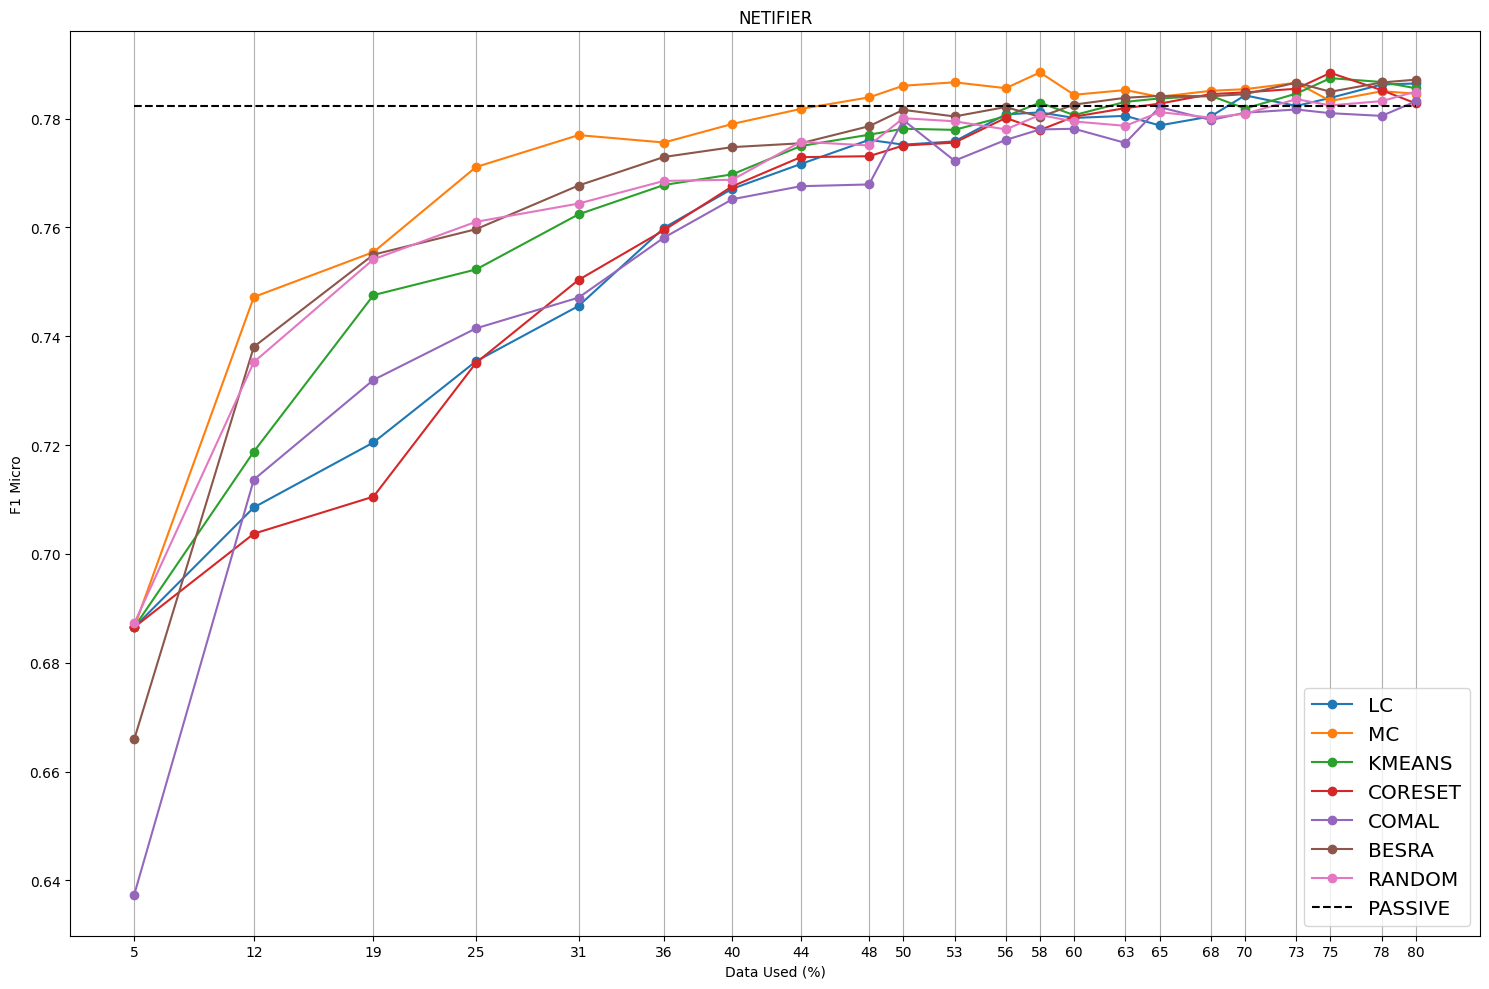

In [10]:
result = load_result('netifier')
plot_results('netifier', result)

# DOCTOR'S ANSWER TEXT

LC STD: 0.0016355171023705133
MC STD: 0.0017469741752549
KMEANS STD: 0.0018571735092236304
CORESET STD: 0.001619966704508274
COMAL STD: 0.0015908623650394708
BESRA STD: 0.0011403874586086106
RANDOM STD: 0.0019910000205395316


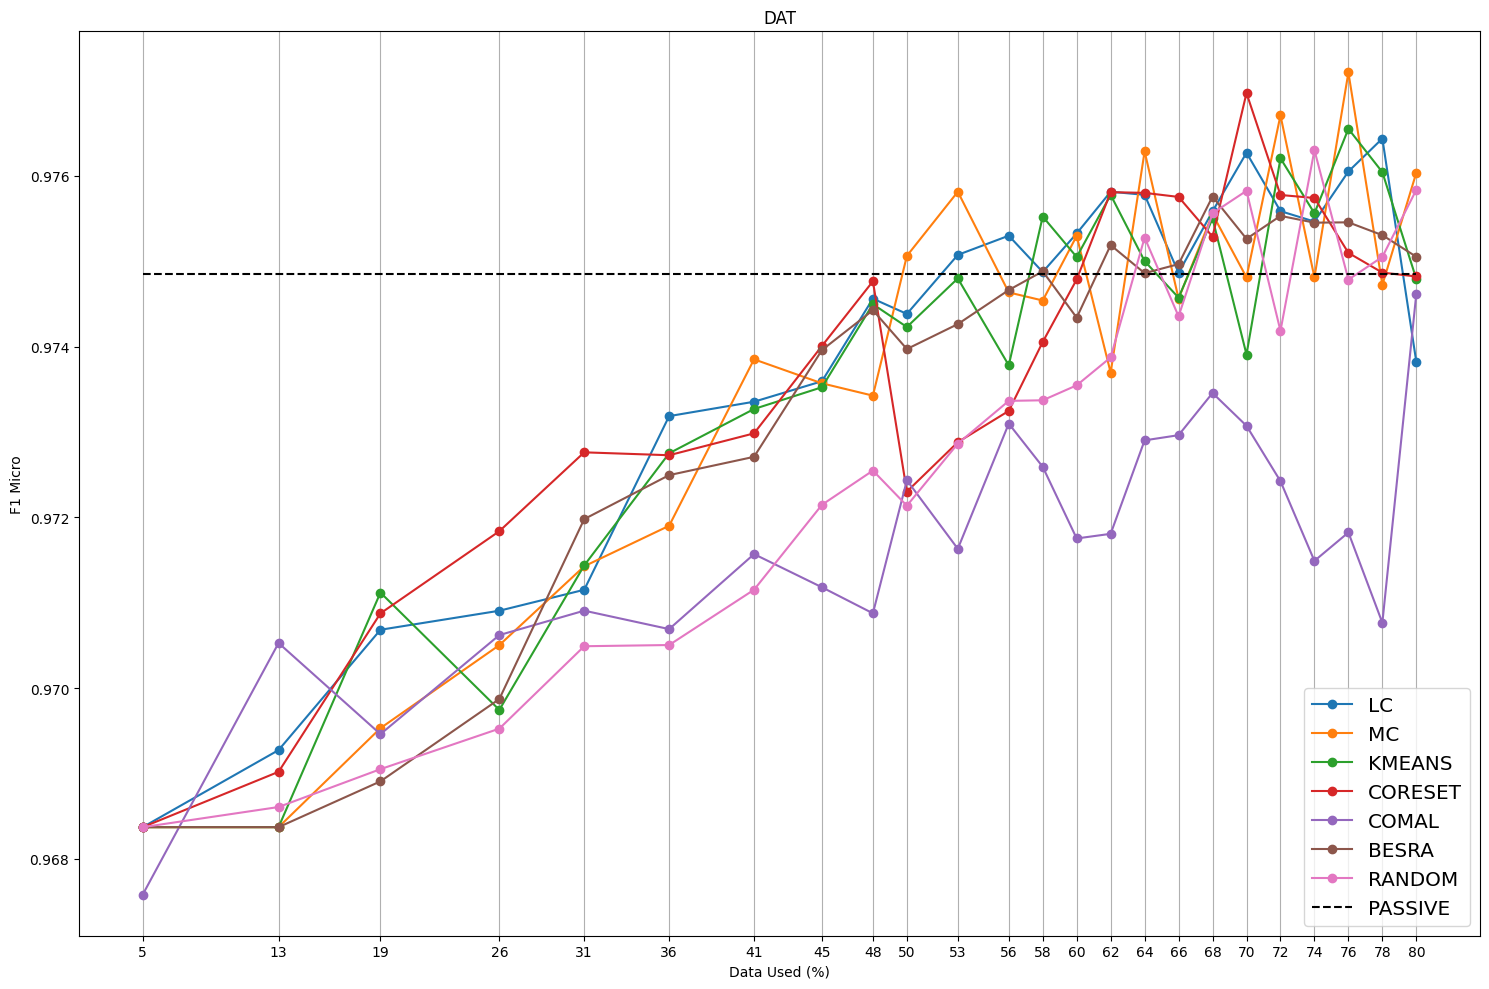

In [11]:
result = load_result('dat')
plot_results('dat', result)

# HATE SPEECH DETECTION

LC STD: 0.004811981474990443
MC STD: 0.003491461527651462
KMEANS STD: 0.009101189577947005
CORESET STD: 0.00719616753514784
COMAL STD: 0.004344349330660515
BESRA STD: 0.0028339579676732074
RANDOM STD: 0.004190643523687418


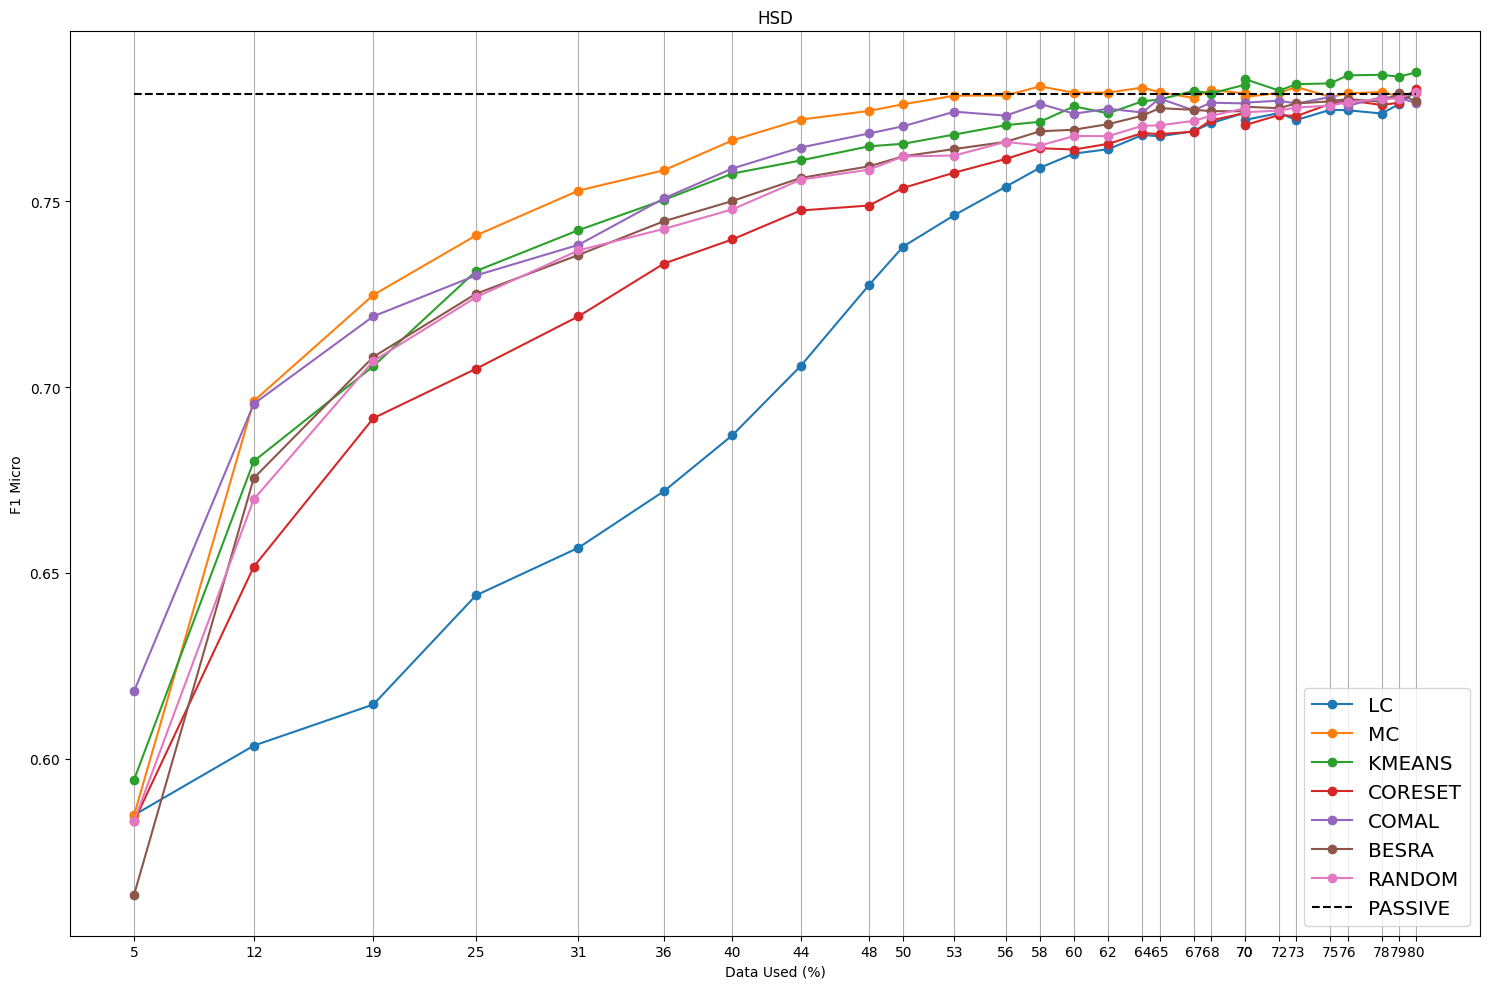

In [12]:
result = load_result('hsd')
plot_results('hsd', result)

# CASA

LC STD: 0.0032237600601926365
MC STD: 0.003051056816128431
KMEANS STD: 0.0037840620735640346
CORESET STD: 0.0034011343540046937
COMAL STD: 0.004112191265924111
BESRA STD: 0.0026728807104155487
RANDOM STD: 0.0032781318114220915


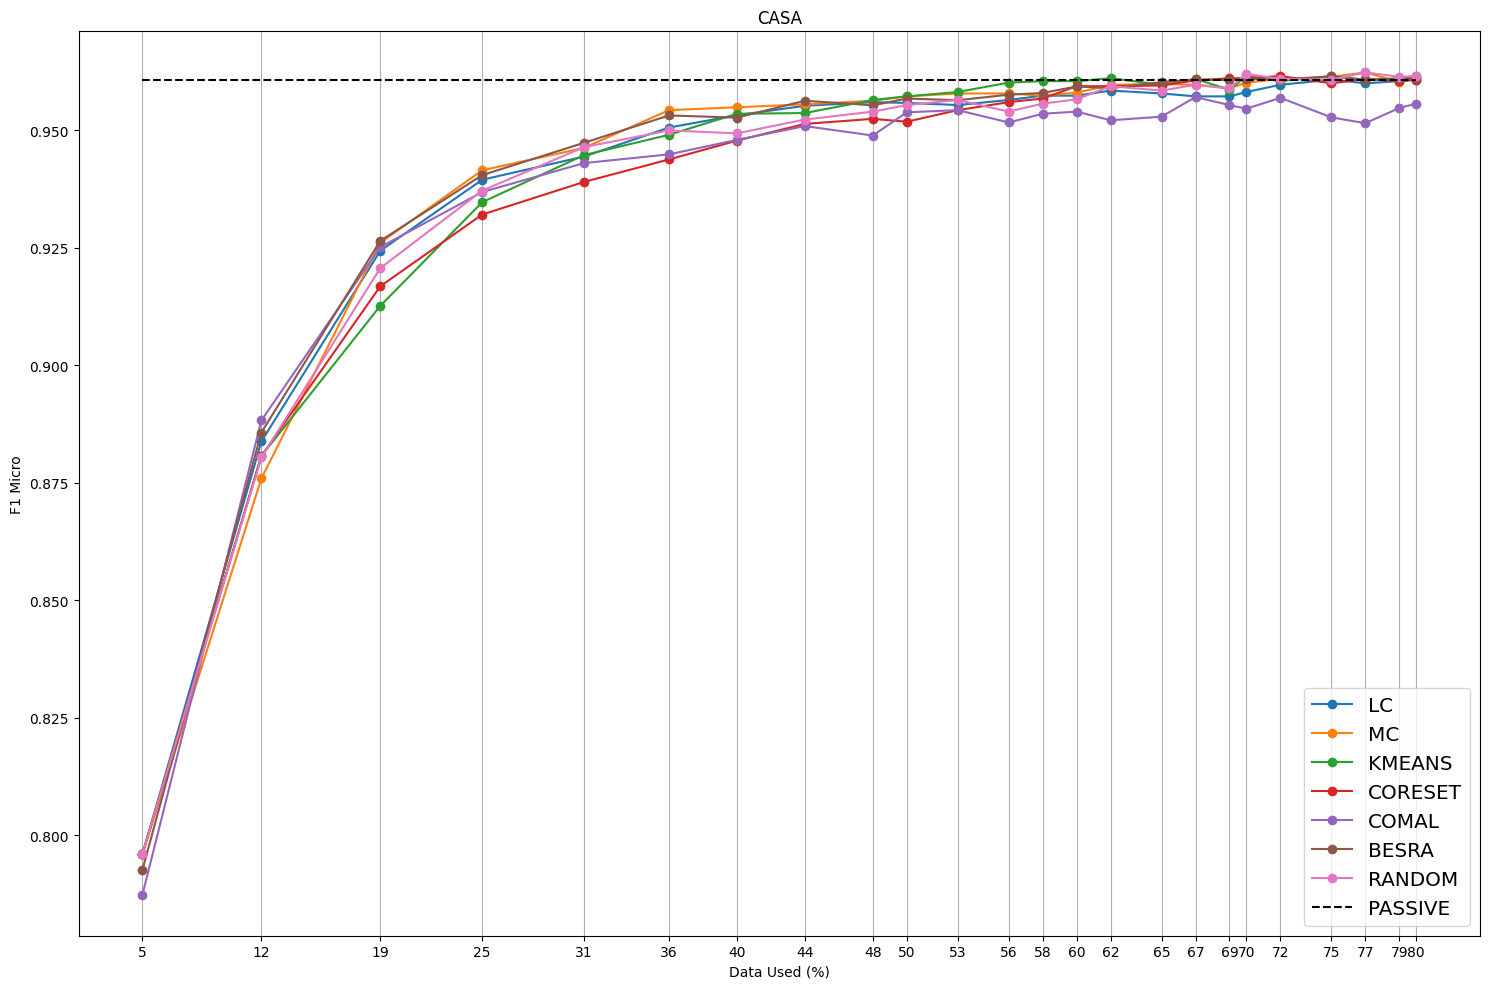

In [13]:
result = load_result('casa')
plot_results('casa', result)

# HOASA

LC STD: 0.0016408238615055254
MC STD: 0.001256050300812452
KMEANS STD: 0.0014427684860015952
CORESET STD: 0.0014207824369625712
COMAL STD: 0.0019816052113903085
BESRA STD: 0.0012597233129492565
RANDOM STD: 0.0015813769742440825


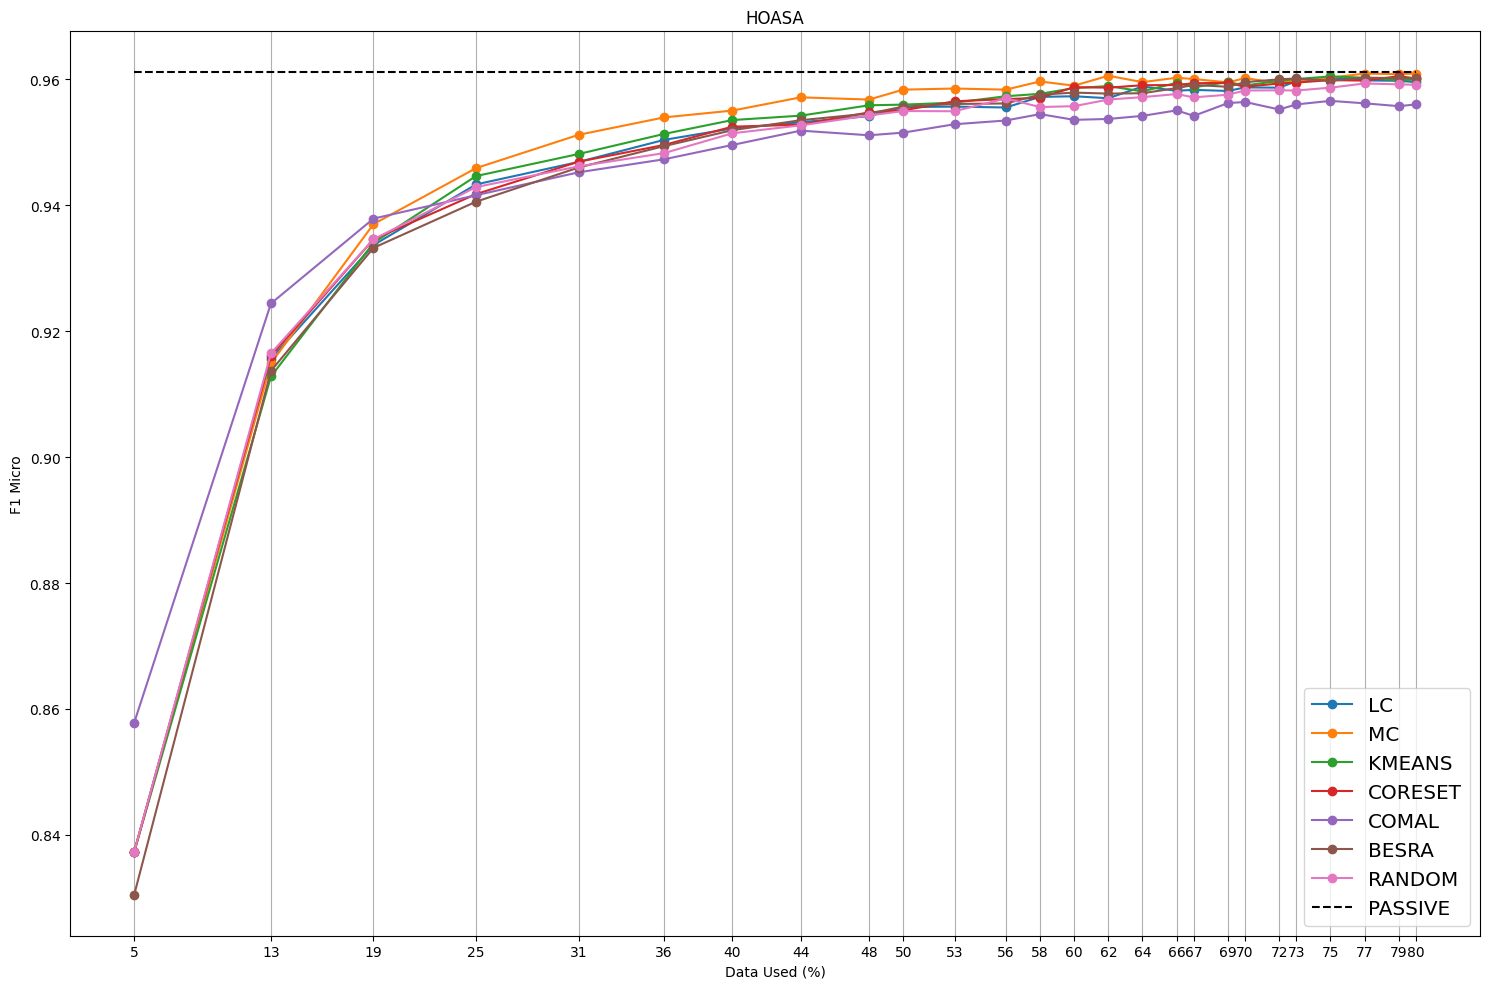

In [14]:
result = load_result('hoasa')
plot_results('hoasa', result)

# SAMPLING DURATION

LC STD: 0.004846623580894969
MC STD: 0.0036811149798710325
KMEANS STD: 0.004816160252828078
CORESET STD: 0.004832688921671002
COMAL STD: 0.006163947617329578
BESRA STD: 0.005249545598316776
RANDOM STD: 0.004093986109147583
Method: lc, Avg time per iteration: 16.13775129999433 s
Method: mc, Avg time per iteration: 49.37357570557368 s
Method: kmeans, Avg time per iteration: 17.91402425084795 s
Method: coreset, Avg time per iteration: 18.619300251915337 s
Method: comal, Avg time per iteration: 42.01095422336033 s
Method: besra, Avg time per iteration: 118.10229010354908 s
Method: random, Avg time per iteration: 0.015085127240135507 s


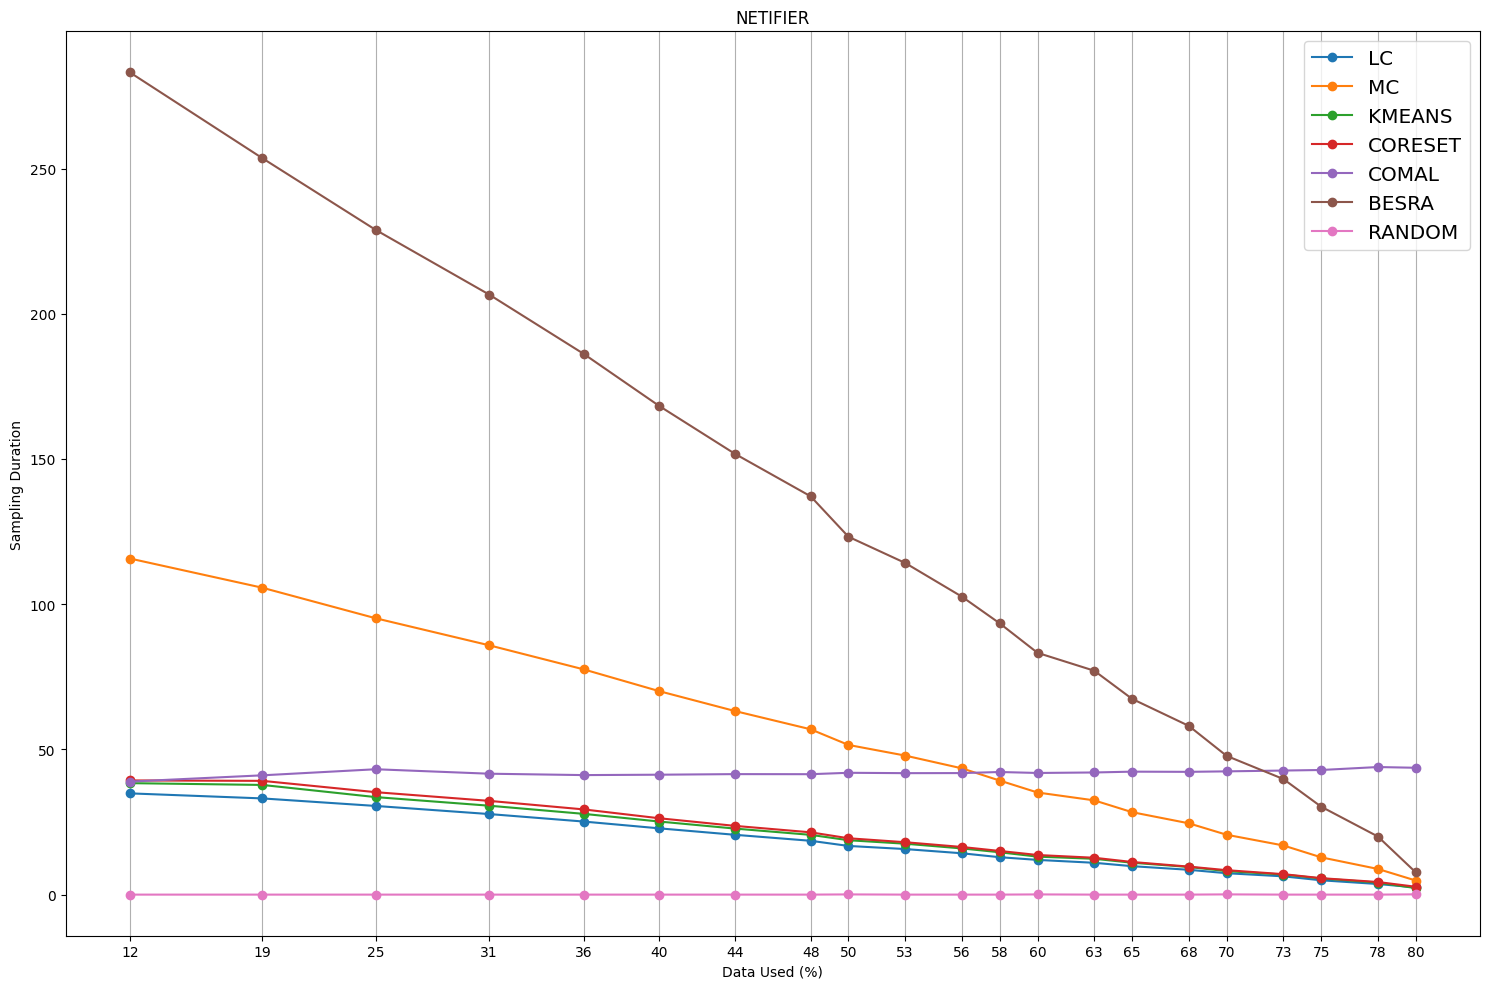

In [15]:
result = load_result('netifier')

for method in result.keys():
    if method != 'passive':
        # Delete first row
        result[method] = result[method].iloc[1:]
        print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('netifier', result, 'Sampling Duration')

LC STD: 0.0016355171023705133
MC STD: 0.0017469741752549
KMEANS STD: 0.0018571735092236304
CORESET STD: 0.001619966704508274
COMAL STD: 0.0015908623650394708
BESRA STD: 0.0011403874586086106
RANDOM STD: 0.0019910000205395316
Method: lc, Avg time per iteration: 3.395379727819692 s
Method: mc, Avg time per iteration: 8.607549856020057 s
Method: kmeans, Avg time per iteration: 3.738242410576862 s
Method: coreset, Avg time per iteration: 3.5945440354554545 s
Method: comal, Avg time per iteration: 8.174909123130467 s
Method: besra, Avg time per iteration: 7.644636249542233 s
Method: random, Avg time per iteration: 0.002933543661366331 s


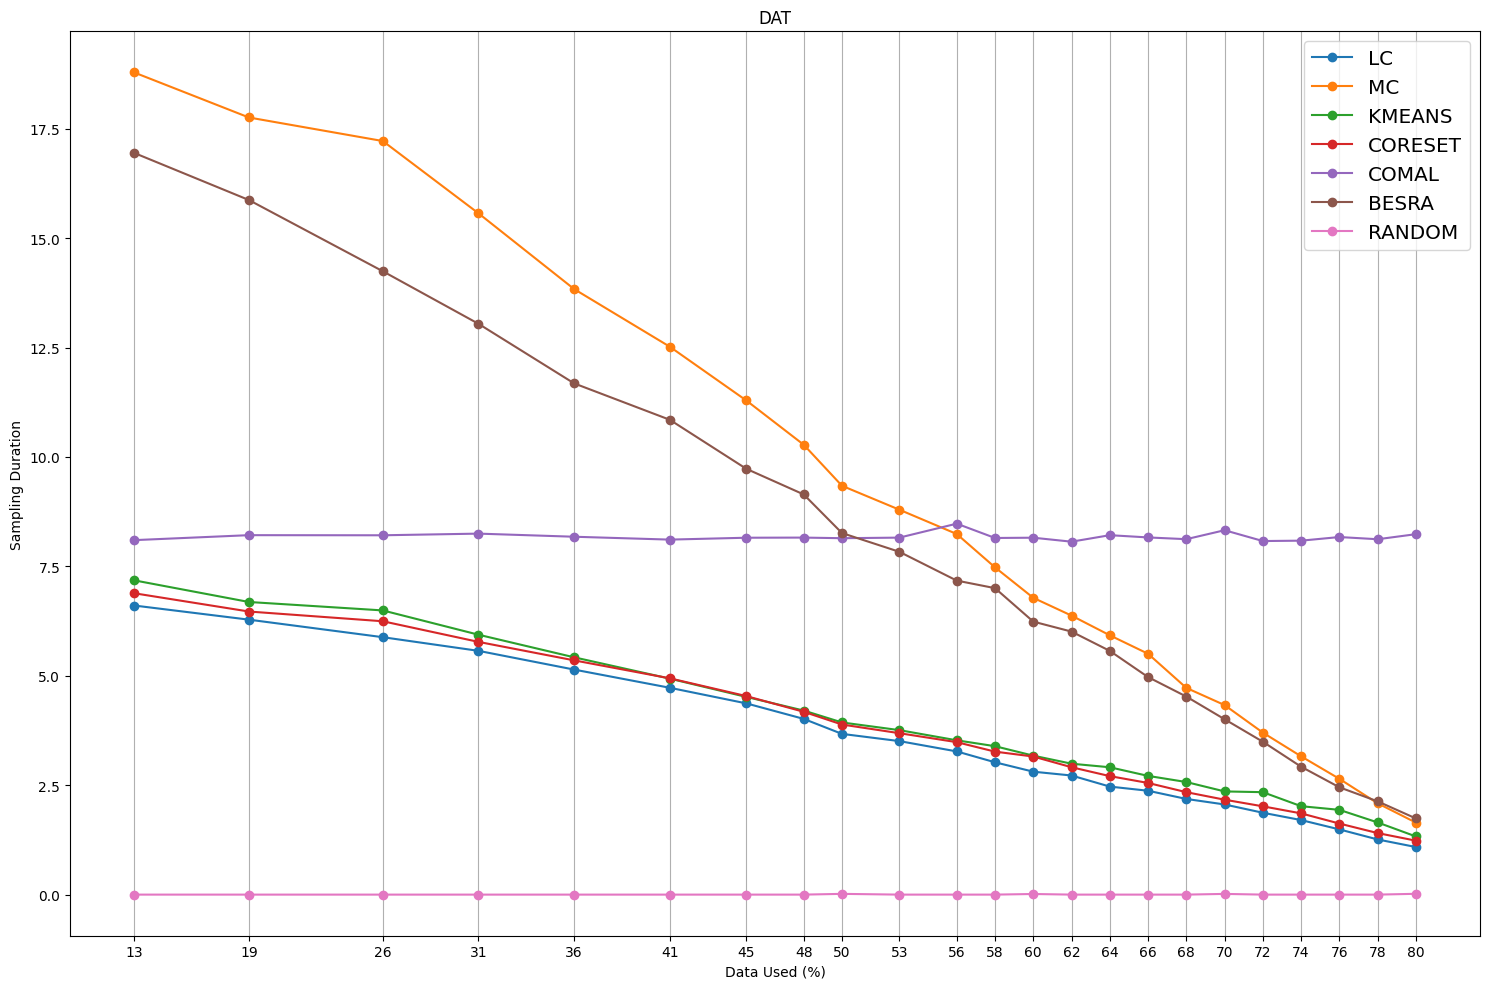

In [16]:
result = load_result('dat')

for method in result.keys():
    if method != 'passive':
        # Delete first row
        result[method] = result[method].iloc[1:]
        print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('dat', result, 'Sampling Duration')

LC STD: 0.004811981474990443
MC STD: 0.003491461527651462
KMEANS STD: 0.009101189577947005
CORESET STD: 0.00719616753514784
COMAL STD: 0.004344349330660515
BESRA STD: 0.0028339579676732074
RANDOM STD: 0.004190643523687418
Method: lc, Avg time per iteration: 16.406513551429466 s
Method: mc, Avg time per iteration: 49.6673260335569 s
Method: kmeans, Avg time per iteration: 19.08594287059925 s
Method: coreset, Avg time per iteration: 16.88684469328986 s
Method: comal, Avg time per iteration: 48.08252326117622 s
Method: besra, Avg time per iteration: 224.52054094738432 s
Method: random, Avg time per iteration: 0.03558960314150205 s


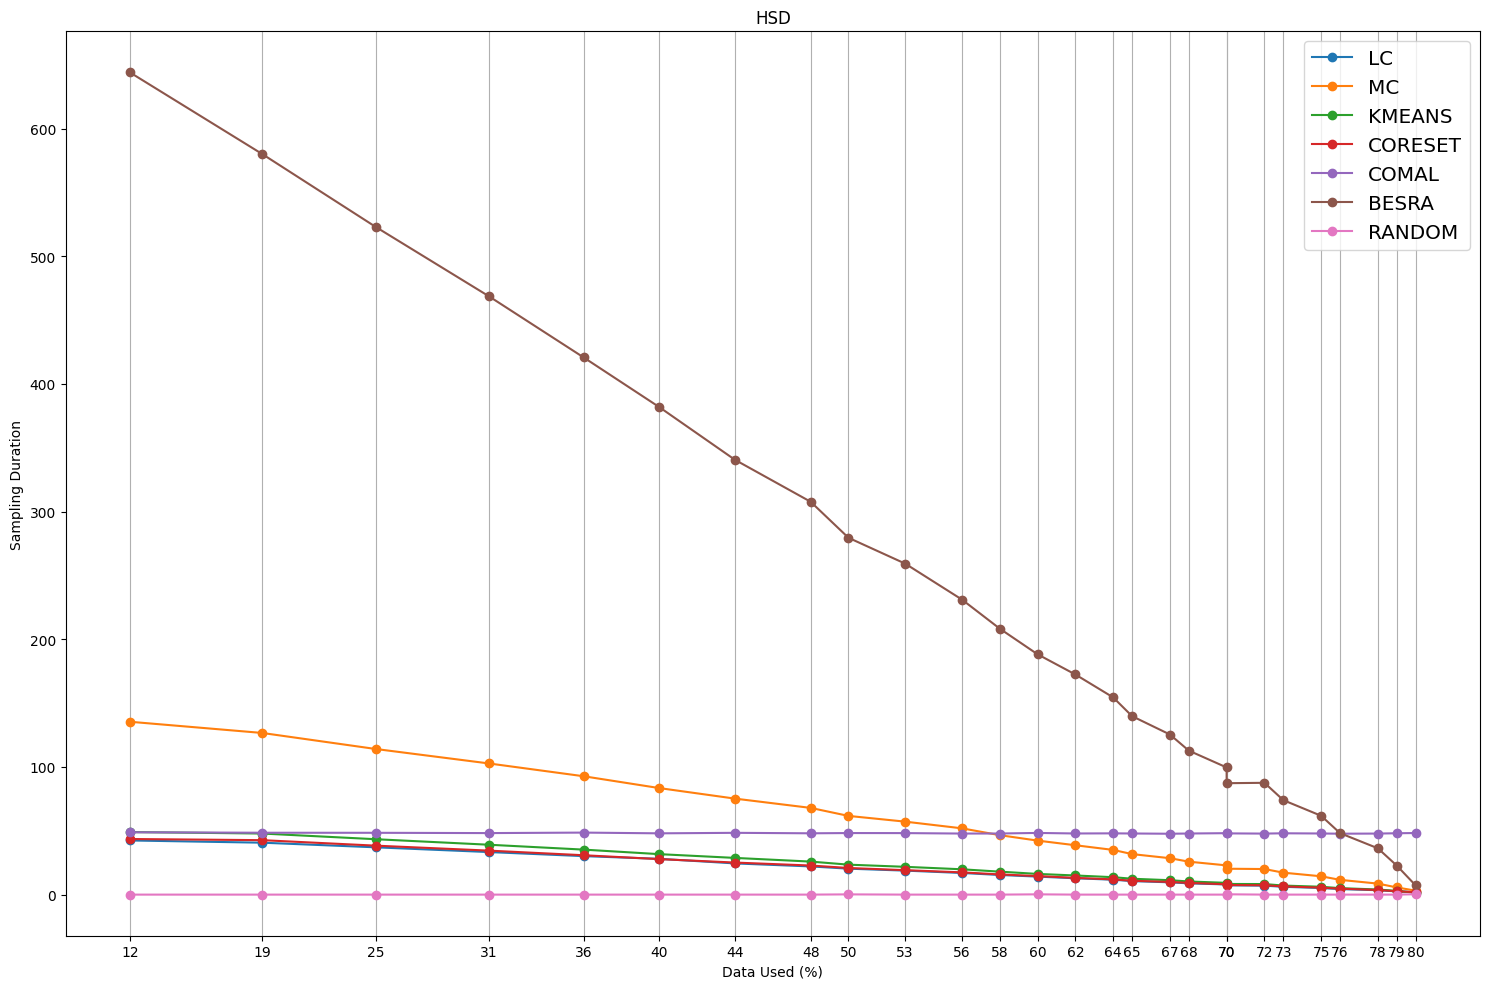

In [17]:
result = load_result('hsd')

for method in result.keys():
    if method != 'passive':
        # Delete first row
        result[method] = result[method].iloc[1:]
        print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('hsd', result, 'Sampling Duration')

LC STD: 0.0032237600601926365
MC STD: 0.003051056816128431
KMEANS STD: 0.0037840620735640346
CORESET STD: 0.0034011343540046937
COMAL STD: 0.004112191265924111
BESRA STD: 0.0026728807104155487
RANDOM STD: 0.0032781318114220915
Method: lc, Avg time per iteration: 3.4366496583689807 s
Method: mc, Avg time per iteration: 6.498416780388873 s
Method: kmeans, Avg time per iteration: 7.374819332620373 s
Method: coreset, Avg time per iteration: 7.403528047644576 s
Method: comal, Avg time per iteration: 17.09999591993249 s
Method: besra, Avg time per iteration: 16.990200285289603 s
Method: random, Avg time per iteration: 0.001639880304751162 s


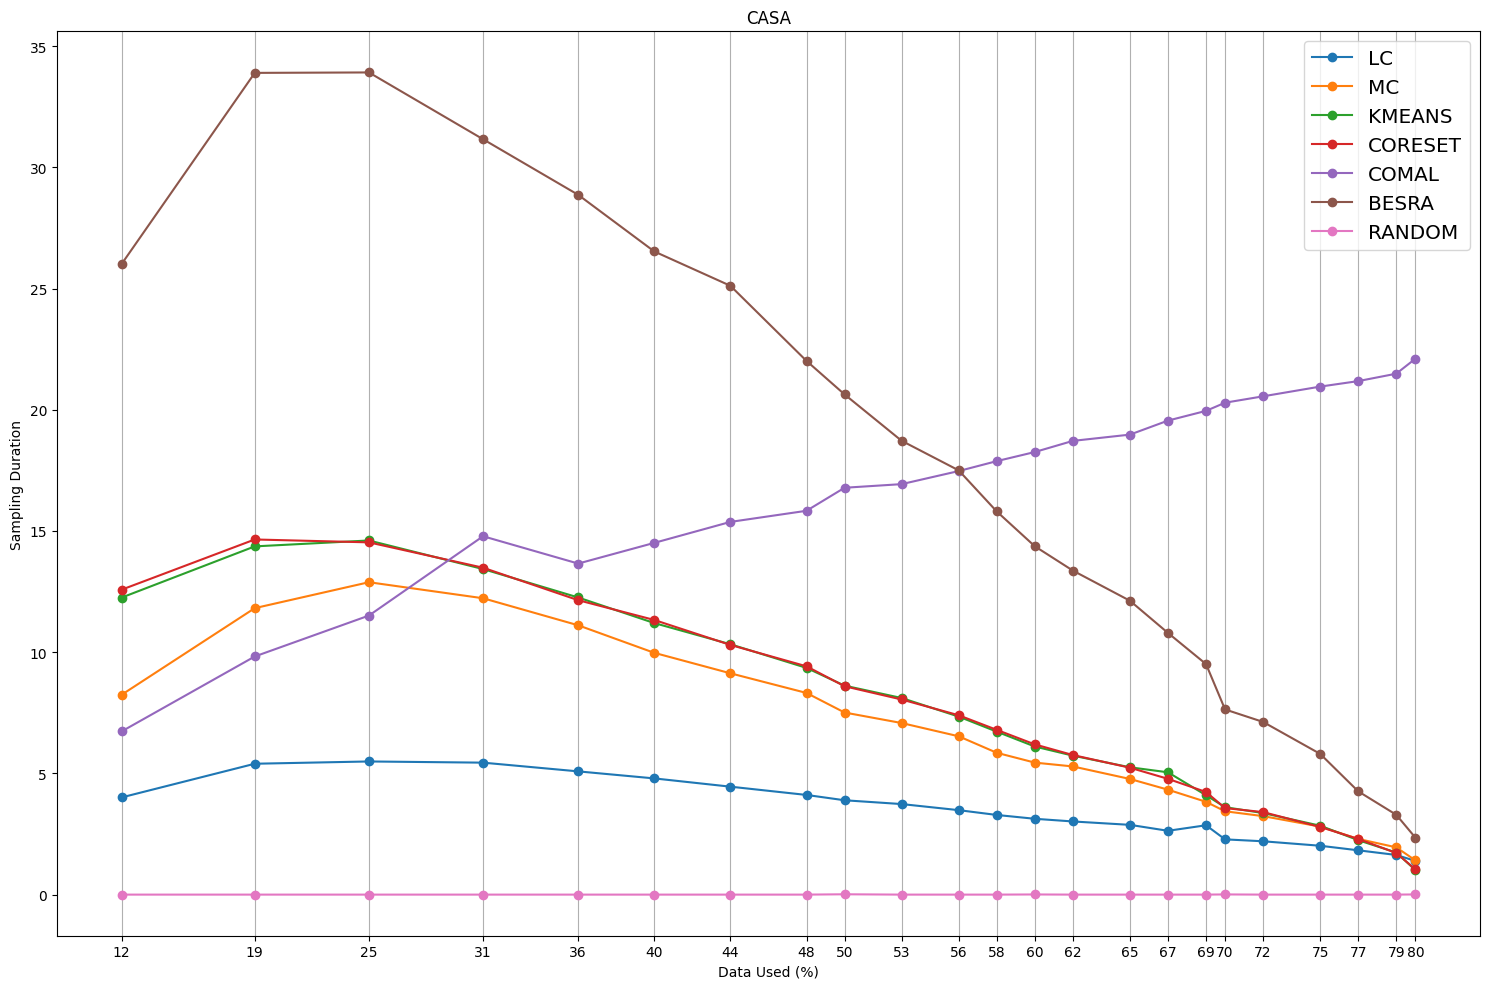

In [18]:
result = load_result('casa')

for method in result.keys():
    if method != 'passive':
        # Delete first row
        result[method] = result[method].iloc[1:]
        print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('casa', result, 'Sampling Duration')

LC STD: 0.0016408238615055254
MC STD: 0.001256050300812452
KMEANS STD: 0.0014427684860015952
CORESET STD: 0.0014207824369625712
COMAL STD: 0.0019816052113903085
BESRA STD: 0.0012597233129492565
RANDOM STD: 0.0015813769742440825
Method: lc, Avg time per iteration: 7.314220121383666 s
Method: mc, Avg time per iteration: 17.7568368434906 s
Method: kmeans, Avg time per iteration: 27.52079234313965 s
Method: coreset, Avg time per iteration: 26.79833585739136 s
Method: comal, Avg time per iteration: 59.662035009384155 s
Method: besra, Avg time per iteration: 74.22969073677062 s
Method: random, Avg time per iteration: 0.003312238693237261 s


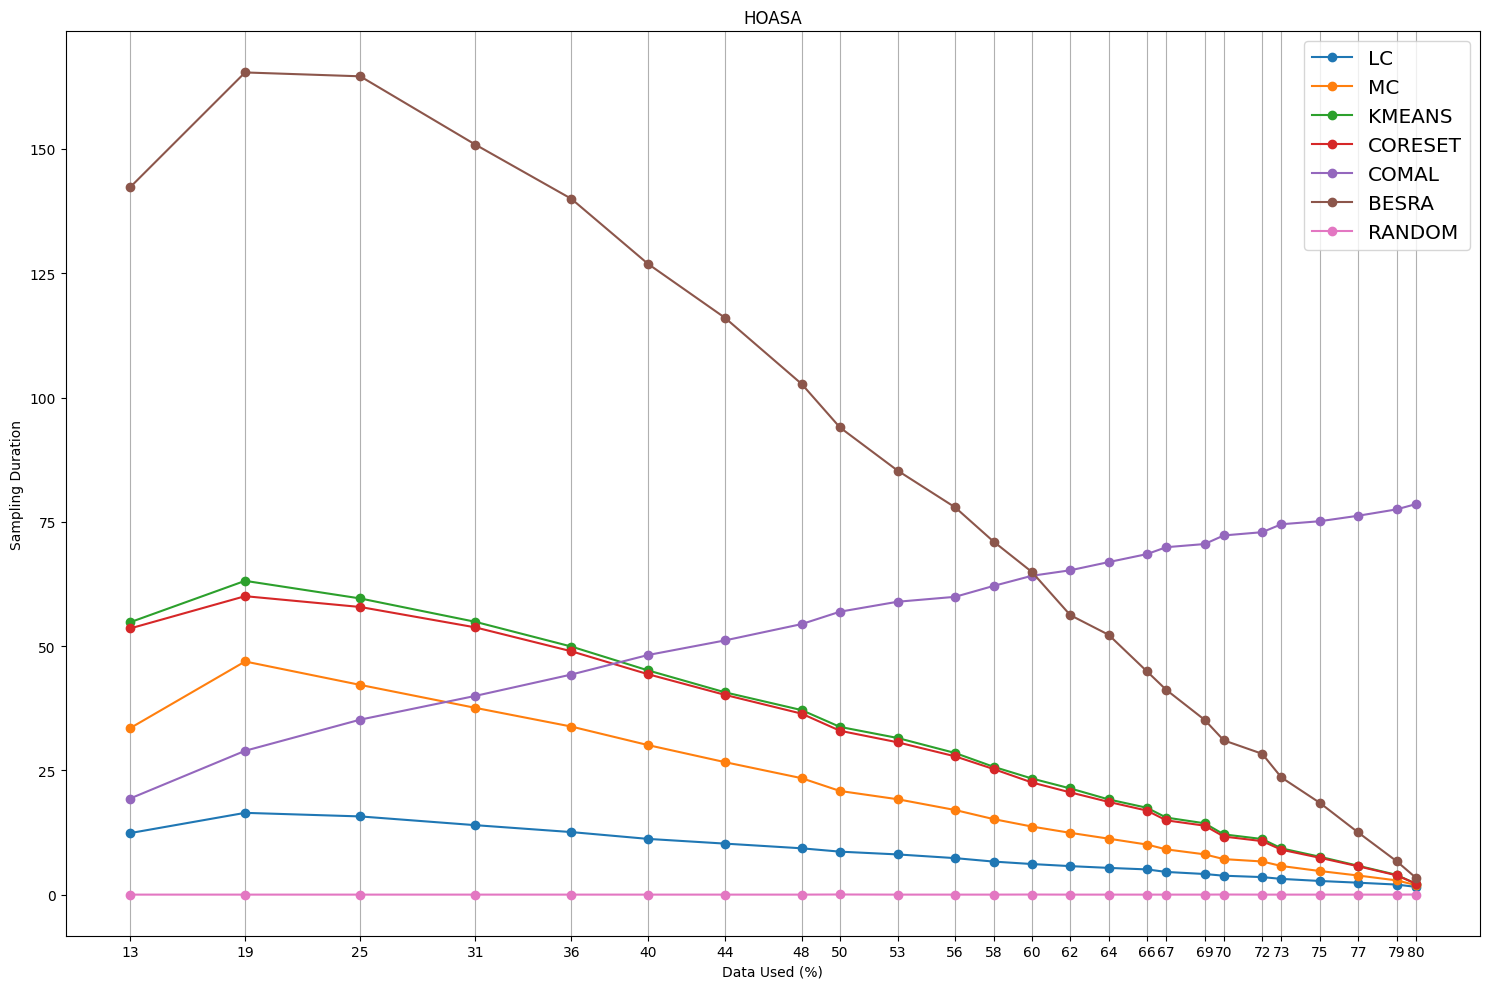

In [19]:
result = load_result('hoasa')

for method in result.keys():
    if method != 'passive':
        # Delete first row
        result[method] = result[method].iloc[1:]
        print(f"Method: {method}, Avg time per iteration: {result[method]['Sampling Duration'].mean()} s")

plot_results('hoasa', result, 'Sampling Duration')